<a href="https://colab.research.google.com/github/kp1216/DL-projects/blob/main/Cat%20and%20Dog%20Classification/Cat_and_Dog_Classifier_using_CNN_with_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 185MB/s]
100% 1.06G/1.06G [00:07<00:00, 148MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close ()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation

In [ ]:
# generators (devide data in batches) for large amount of data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256) # reshape (because image size are different)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256) # reshape (because image size are different)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalise (pixles value between 0 to 1)
def process(image,label):
  image = tf.cast(image/225, tf.float32)
  return image, label

train_ds = train_ds.map(process) # map takes one image and give to function and iterate
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3) ,padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(64,kernel_size = (3,3) ,padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3) ,padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 10, validation_data = validation_ds)


Epoch 1/10
625/625 [==============================] - 78s 110ms/step - loss: 1.1501 - accuracy: 0.6098 - val_loss: 0.6225 - val_accuracy: 0.6440
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5932 - accuracy: 0.6955 - val_loss: 0.5305 - val_accuracy: 0.7408
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5094 - accuracy: 0.7534 - val_loss: 0.5478 - val_accuracy: 0.7178
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4281 - accuracy: 0.8019 - val_loss: 0.4881 - val_accuracy: 0.7894
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3728 - accuracy: 0.8329 - val_loss: 0.4456 - val_accuracy: 0.7964
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3018 - accuracy: 0.8706 - val_loss: 0.4520 - val_accuracy: 0.8056
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2149 - accuracy: 0.9121 - val_loss: 0.4833 - val_ac

In [ ]:
import matplotlib.pyplot as plt

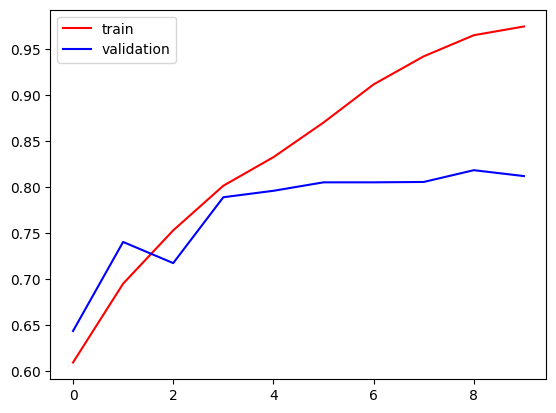

In [ ]:
plt.plot(history.history["accuracy"],color = "red",label = "train")
plt.plot(history.history["val_accuracy"],color = "blue",label = "validation")
plt.legend()
plt.show()

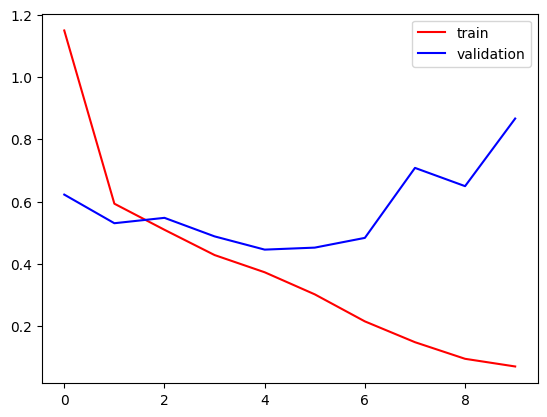

In [ ]:
plt.plot(history.history["loss"],color = "red",label = "train")
plt.plot(history.history["val_loss"],color = "blue",label = "validation")
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting
# add more data
# data augmentation
# l1 and l2 regularization
# dropout
# batch norm
# reduce complexity



In [ ]:
#DATA AUGMENTATION


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

batch_size = 16
train_datagen = ImageDataGenerator(
rescale = 1/255,
shear_range  = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

# test data
test_datagen = ImageDataGenerator(rescale = 1/255)

# train data
train_generator = train_datagen.flow_from_directory("/content/train"
, target_size = (150,150),
    batch_size = batch_size ,
    class_mode = "binary"
)


validation_generator = train_datagen.flow_from_directory(
"/content/test", target_size = (150,150),
    batch_size = batch_size ,
    class_mode = "binary"
)





Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])

In [ ]:
history = model.fit_generator (
                  train_generator,
steps_per_epoch = 2000//batch_size ,
epochs = 100,
validation_data = validation_generator,
validation_steps = 800//batch_size)

Epoch 1/100


<ipython-input-10-4562c1392f55>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator (


125/125 [==============================] - 17s 136ms/step - loss: 0.5027 - accuracy: 0.7580 - val_loss: 0.4554 - val_accuracy: 0.7937
Epoch 2/100
125/125 [==============================] - 17s 136ms/step - loss: 0.4866 - accuracy: 0.7770 - val_loss: 0.4587 - val_accuracy: 0.7812
Epoch 3/100
125/125 [==============================] - 18s 143ms/step - loss: 0.4766 - accuracy: 0.7750 - val_loss: 0.4566 - val_accuracy: 0.7925
Epoch 4/100
125/125 [==============================] - 17s 140ms/step - loss: 0.5131 - accuracy: 0.7500 - val_loss: 0.5187 - val_accuracy: 0.7550
Epoch 5/100
125/125 [==============================] - 19s 154ms/step - loss: 0.4925 - accuracy: 0.7670 - val_loss: 0.4665 - val_accuracy: 0.7850
Epoch 6/100
125/125 [==============================] - 17s 136ms/step - loss: 0.4360 - accuracy: 0.8025 - val_loss: 0.4393 - val_accuracy: 0.8125
Epoch 7/100
125/125 [==============================] - 17s 135ms/step - loss: 0.4749 - accuracy: 0.7805 - val_loss: 0.4633 - val_accurac

In [ ]:
import matplotlib.pyplot as plt

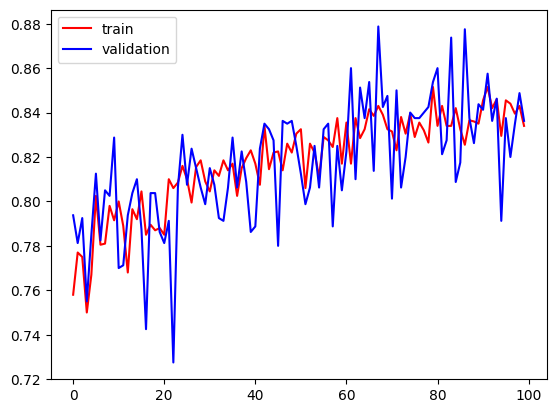

In [ ]:
plt.plot(history.history["accuracy"],color = "red",label = "train")
plt.plot(history.history["val_accuracy"],color = "blue",label = "validation")
plt.legend()
plt.show()

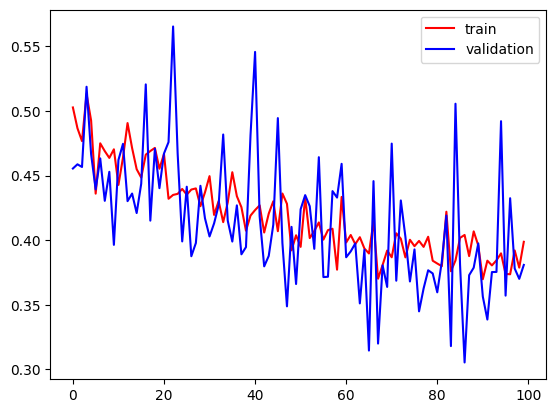

In [ ]:
plt.plot(history.history["loss"],color = "red",label = "train")
plt.plot(history.history["val_loss"],color = "blue",label = "validation")
plt.legend()
plt.show()

In [ ]:
# The overfitting is reduced but we have unstable accuracy